In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def model_layers_(model):
    layer_items = []
    for i,layer in enumerate(model.layers):
        name = "%02d: %s"%(i,layer.name)
        if len(layer.weights)>0:
            name = name + " %s %s"%(layer.weights[0].numpy().shape,layer.weights[1].numpy().shape)
            layer_items.append(
                dict(
                    weight=layer.weights[0].numpy(),
                    bias=layer.weights[1].numpy(),
                    name=layer.name
                )
            )
        print(name)
    return layer_items

In [2]:

model_prefix = "model.4.6"
#model_prefix = "model.q.3"


model_name = os.path.join(os.getcwd(),"data",f"tclab.{model_prefix}.pinn.tf")
model = tf.keras.models.load_model(model_name, compile=False)

layer_items = model_layers_(model)

00: n-pin (1, 50) (50,)


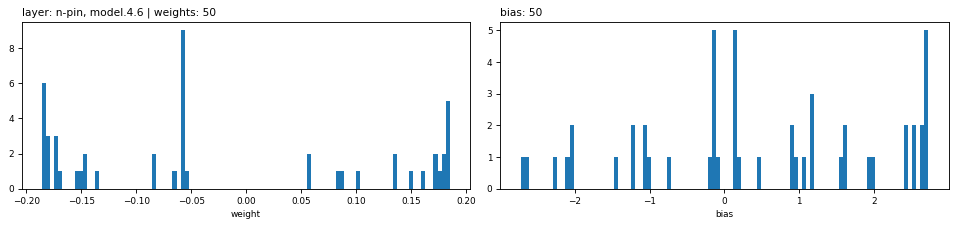

In [3]:
plt.rcParams["font.size"] = 8
plt.rcParams["figure.dpi"] = 80

nrows,ncols = len(layer_items),2
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=[6*ncols,3*nrows],tight_layout=True)
        
ax = ax[np.newaxis,:]

bins = 100

for j,item in enumerate(layer_items):
    
    weight = item["weight"].flatten()
    bias = item["bias"].flatten()
    name = item["name"]

    i = 0
    yy,xx,pp = ax[j,i].hist(weight,bins=bins)    
    ax[j,i].set_xlabel("weight")

    ff = yy/yy.max()
    for p,f,x in list(zip(pp,ff,xx)):
        if (x>-0.01) & (x<0.01):        
            p.set_facecolor((192/256,0,0,1))

    i = 1
    yy,xx,pp = ax[j,i].hist(bias,bins=bins)    
    ax[j,i].set_xlabel("bias")

    ax[j,0].set_title(f"layer: {name}, {model_prefix} | weights: {weight.shape[0]}",x=0,ha="left")
    ax[j,1].set_title(f"bias: {bias.shape[0]}",x=0,ha="left")

plt.suptitle(f"",x=0,ha="left")
plt.tight_layout()

fig.savefig(os.path.join(os.getcwd(),"data",f"tclab.{model_prefix}.pinn.inside.png"))

plt.show()

plt.close()
